# Benford's Law Applied to San Diego City Budgets

This is a prototype, only covering FY11 data.
Next steps: retrieve 2011-2018 datam, analyze, aggregate, and chart.  Then write it up.

In [30]:
%matplotlib inline

In [32]:
from urllib.request import urlretrieve
import pandas as pd
from collections import Counter
from pprint import pprint
import os
import seaborn as sns
from matplotlib import pyplot as plt

In [63]:
benfords_distribution = [30.1,17.6,12.5,9.7,7.9,6.7,5.8,5.1,4.6]

In [2]:
fn = 'operating_budget_FY{0}_datasd.csv'
base = 'http://seshat.datasd.org/budget/{0}'.format( fn )
datapath = './data/sdcity_benford/'

for year in range(11,19):
    dataurl = base.format( year )
    fn_ = fn.format( year )
    if not os.path.exists( datapath+fn_ ):
        print( 'retrieving FY{0}'.format( year ) )
        urlretrieve(dataurl,  datapath+fn_ )
    else:
        print ('FY{0} data on disk already'.format( year ) )

retrieving FY11
retrieving FY12
retrieving FY13
retrieving FY14
retrieving FY15
retrieving FY16
retrieving FY17
retrieving FY18


In [3]:
def get_yearly_benford( df ):
    amounts = df['amount']
    ctr = Counter()
    total = df[df['amount']>0]['amount'].count()
    for a in amounts:
        if a>0:
            digit = a.astype(str)[0]
        try:
            ctr[int(digit)]+=1
        except UnboundLocalError:
            pprint( a )
        
    pct = {}
    raw = {}
    for digit, ct in ctr.items():
        pct[digit] = ct/total
        raw[digit] = ct
        
    return {
        'distributions' : pct,
        'count' : total,
        'raw_counts' : raw
    }
            

In [4]:
data = {}
for year in range(11,19):
    df = pd.read_csv( 'data/sdcity_benford/operating_budget_FY{0}_datasd.csv'.format( year ) )
    data[year] = get_yearly_benford( df )

-2512.0


In [71]:
year = 11
d = data[year]['distributions']
sk = sorted(d.keys())
arr = []
for k in sk:
    arr.append(d[k]*100)
    

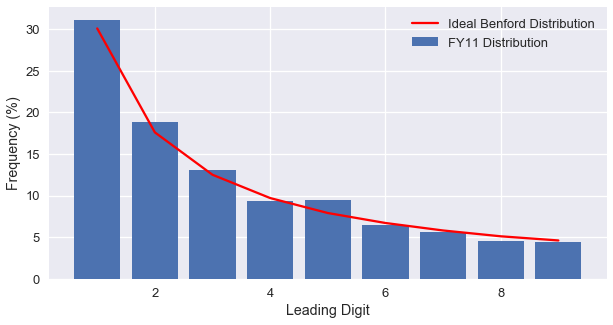

In [76]:
# sns.lmplot(x=df.Attack, y=df.Defense)
plt.style.use('seaborn-talk')
plt.rc('figure', figsize=(10, 5))
plt.xlabel('Leading Digit')
plt.ylabel('Frequency (%)')
plt.bar( sk, arr, label='FY{0} Distribution'.format( year ) )
plt.plot( sk, benfords_distribution, 'r', label='Ideal Benford Distribution' )
plt.legend(loc='upper right')

In [43]:
plt.style.available

['_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2']